<a href="https://colab.research.google.com/github/NavyaKiran/Basic-CNN-Implementation/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import cifar10
#import the required dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#initialize the training and test data
x_train, x_test = x_train / 255.0, x_test / 255.0
#normalize the data by dividing x_train and x_test by the number of pixels an image
#can have

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
print("The shape of the training data is")
#display the shape of the training data
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
#from the output, we see that the there are 50000 samples in the training data
#where each image is of 32X32 resolution and there are 3 channels (RGB)
#y is a vector of labels. m

The shape of the training data is
x_train: (50000, 32, 32, 3)
y_train: (50000, 1)


In [ ]:
print("The shape of the test data is ")
#display the shape of the test data
print("x_test:", x_test.shape)
#the test data contains 10000 samples where each sample is of resolution 32X32 and there
#are 3 channels (RGB).
print("y_test:", y_test.shape)

The shape of the test data is 
x_test: (10000, 32, 32, 3)
y_test: (10000, 1)


In [ ]:
y_train
#print some values from training

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#class names of the images from https://www.cs.toronto.edu/~kriz/cifar.html
#this is a list representing the names of the classes

[6]
frog


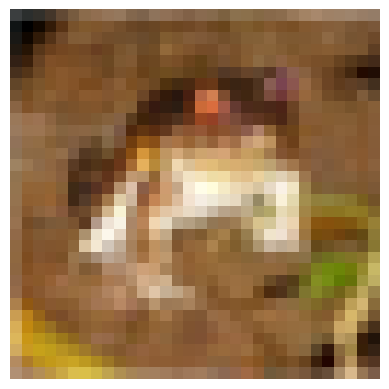

[9]
truck


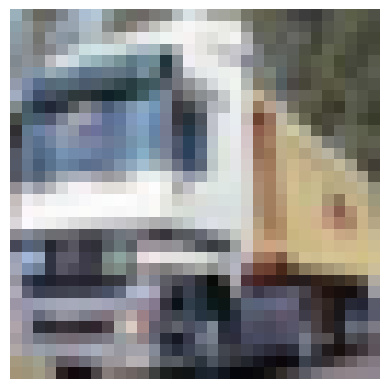

[9]
truck


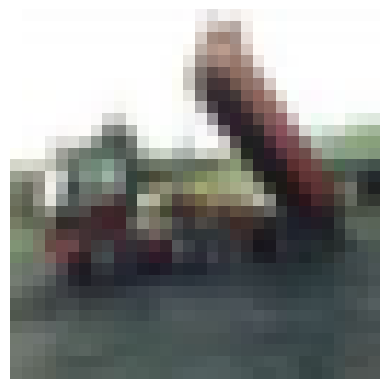

[4]
deer


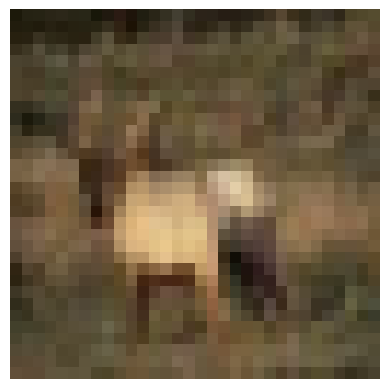

[1]
automobile


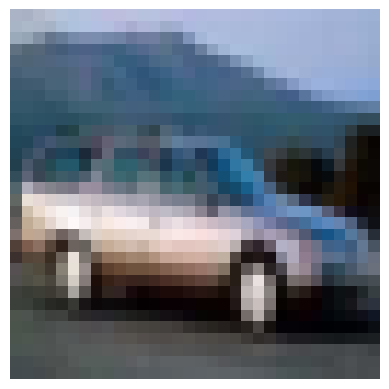

[1]
automobile


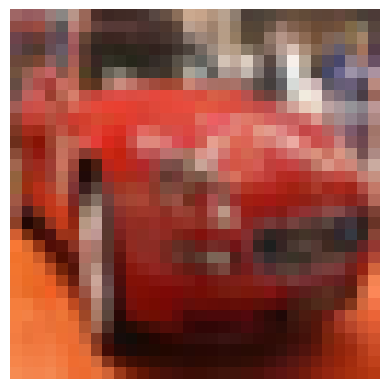

[2]
bird


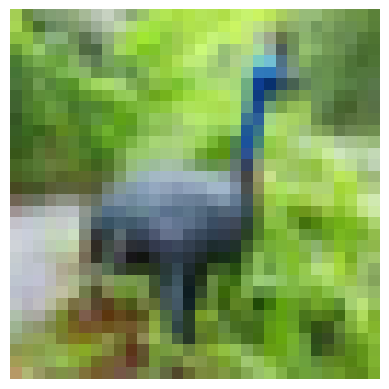

[7]
horse


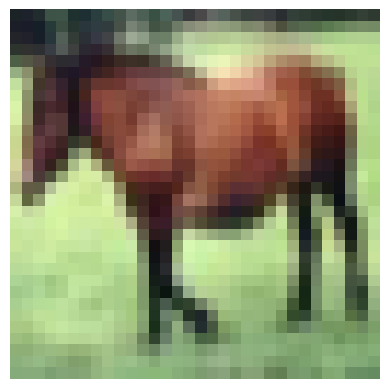

[8]
ship


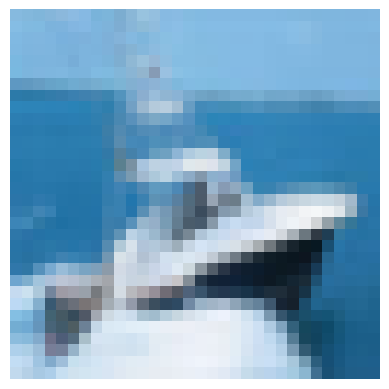

[3]
cat


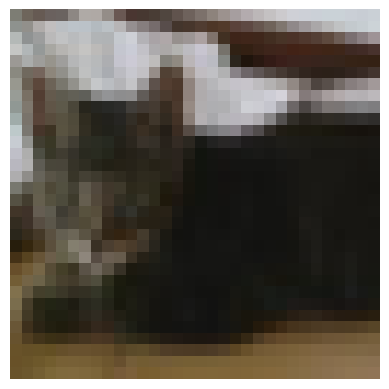

In [ ]:
import matplotlib.pyplot as plt
#import pyplot from matplotlib
for i in range(0, 10):
  #iterate over the first 10 items
  print(y_train[i])
  #print the label
  plt.imshow(x_train[i], cmap = 'gray')
  #show the image
  print(class_names[y_train[i][0]])
  #print the name associated with the label
  plt.axis('off')
  #do not show the access
  plt.show()
  #display the image

In [ ]:
#encoding of labels
from tensorflow.keras.utils import to_categorical, plot_model
# # y_train = y_train.astype('float32')
# # y_test = y_test.astype('float32')
# # y_train = to_categorical(y_train)
# # y_test = to_categorical(y_test)

# print("shape of y_train after encoding is ", y_train.shape)
# print("shape of y_test after encoding is ", y_test.shape)

#we do not need to encode the labels because we are using sparse_categorical_crossentropy as the loss function
#which auto encodes labels

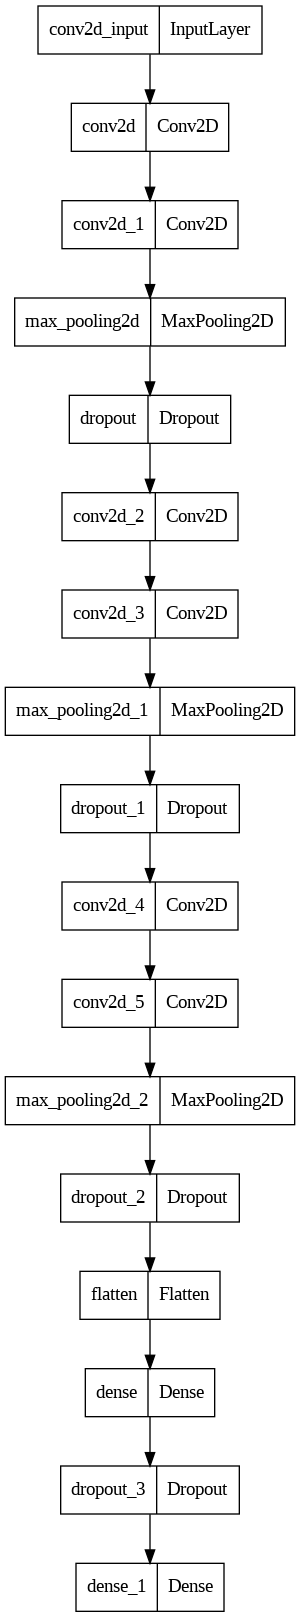

In [ ]:
from tensorflow.keras.models import Sequential
#import sequential model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
#import necessary components (2D convolutional layer, max pooling, flatten, dense layer and dropout)

#create a new sequential model object

model = Sequential()

#add layers to the sequential model
#pooling layer to reduce the spatial dimensions
#activation function used: relu
#input shape is mentioned only in the first layer
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#the dropout layer will randomly deactivate some input units during each training update
model.add(Dropout(0.3))

#adding second layer
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#adding third layer
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#flatten the output
model.add(Flatten())
#add a dense layer for classification
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
#since there are 10 classes, we declare 10 neurons
model.add(Dense(10, activation='softmax'))

#show a figurative description of the netowrk
plot_model(model)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#compile the model with adam optimizer, loss function as sparse_categorical_crossentropy and accuracy as optimizer.

In [ ]:
model.fit(x_train, y_train, epochs=25, batch_size=64)
#fit the model on training data
#the model fits for 20 epoch with each batch of size 64

Epoch 1/25
782/782 [==============================] - 358s 455ms/step - loss: 1.8209 - accuracy: 0.3125
Epoch 2/25
782/782 [==============================] - 354s 453ms/step - loss: 1.4188 - accuracy: 0.4831
Epoch 3/25
782/782 [==============================] - 357s 456ms/step - loss: 1.2478 - accuracy: 0.5578
Epoch 4/25
782/782 [==============================] - 346s 443ms/step - loss: 1.1436 - accuracy: 0.5930
Epoch 5/25
782/782 [==============================] - 336s 429ms/step - loss: 1.0653 - accuracy: 0.6243
Epoch 6/25
782/782 [==============================] - 335s 428ms/step - loss: 1.0147 - accuracy: 0.6444
Epoch 7/25
782/782 [==============================] - 335s 428ms/step - loss: 0.9572 - accuracy: 0.6628
Epoch 8/25
782/782 [==============================] - 334s 427ms/step - loss: 0.9284 - accuracy: 0.6791
Epoch 9/25
782/782 [==============================] - 330s 422ms/step - loss: 0.8894 - accuracy: 0.6887
Epoch 10/25
782/782 [==============================] - 330s 422m

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
#evaluate the model

313/313 [==============================] - 21s 65ms/step - loss: 0.6312 - accuracy: 0.7877


In [ ]:
pred = model.predict(x_test)
#use model to predict on test set

313/313 [==============================] - 19s 62ms/step


In [ ]:
import numpy as np
print(np.argmax(pred[0]))
print(y_test[0])

3
[3]
